# Loading in cloud data

In [1]:
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import rioxarray as rxr
import torch


In [5]:
file = './TestData/2022_01_10/S_NWC_CMA_MSG4_globeM-VISIR_20220110T000000Z_4dcc7a6a8c7eaf55c00bbb2884fc3057.nc'
files = os.listdir('./TestData/CloudData/2020_11_18')
rand_file_idx = np.random.randint(97)
rand_file = "./TestData/CloudData/2020_11_18/" + files[rand_file_idx]

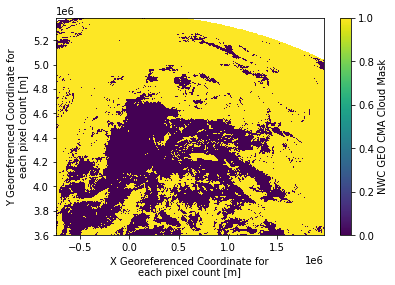

In [8]:
dat =  xr.open_dataset(rand_file, engine="h5netcdf", decode_cf = True)
#dat1 = rxr.open_rasterio(rand_file)
dat.cma.plot()

In [38]:
lol = np.where(dat1[0].cma.data==255,1,0)
print(lol[0,].shape)
dat.cma.data.shape
np.allclose(lol[0,],dat.cma.data)

(595, 905)


False

# Plotting Cloud data on map

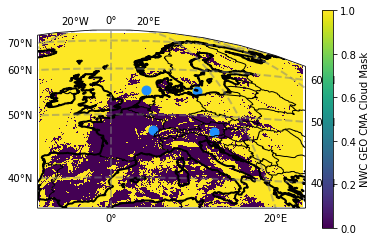

In [9]:
data_proj = ccrs.Geostationary(central_longitude=0, 
    satellite_height=35785863.00, sweep_axis="y", globe=ccrs.Globe())
map_proj = data_proj
ax = plt.axes(projection=map_proj)
ax.set_extent([-8.8, 24, 36.5, 90], crs=ccrs.PlateCarree())
#ax.stock_img()
ax.add_feature(cf.COASTLINE, lw=2)
ax.add_feature(cf.BORDERS)
#tester.plot(transform = data_proj)
dat.cma.plot(transform = data_proj)
plt.scatter(x = 5.9888, y = 54.9831, color="dodgerblue", s=80, transform = ccrs.PlateCarree())
plt.scatter(x = 15.01699, y = 54.9831, color="dodgerblue", s=80, transform = ccrs.PlateCarree())
plt.scatter(x = 5.9888, y = 47.3024, color="dodgerblue", s=80, transform = ccrs.PlateCarree())
plt.scatter(x = 15.01699, y = 47.3024, color="dodgerblue", s=80, transform = ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')


# Plotting cloud data on smaller map (Germany + extra - so input_size)

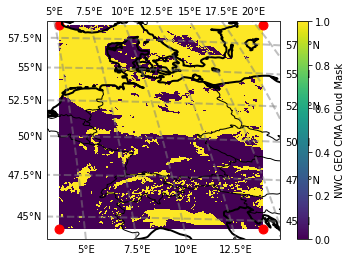

In [10]:
#tester = dat.cma[168:368,370:570]
input_area = dat.cma[168+12-40:368-12+40,370+12-40:570-12+40]
data_proj = ccrs.Geostationary(central_longitude=0, 
    satellite_height=35785863.00, sweep_axis="y", globe=ccrs.Globe())
map_proj = data_proj
ax = plt.axes(projection=map_proj)
ax.set_extent([4.5, 14.8, 44, 59], crs=ccrs.PlateCarree()) # (ind fra venstre, ind fra højre, højde nedefra, højde oppefra)
#ax.stock_img()
ax.add_feature(cf.COASTLINE, lw=2)
ax.add_feature(cf.BORDERS)
input_area.plot(transform = data_proj)
#dat.cma.plot(transform = data_proj)
#Plotting corner-points (transformation functions found later in this document)
plt.scatter(x = 5.278151413236939, y = 58.62858511635695, color="red", s=80, transform = ccrs.PlateCarree()) #Top-left corner
plt.scatter(x = 3.715224194668945, y = 44.285549828485195, color="red", s=80, transform = ccrs.PlateCarree()) # Bottom-left corner
plt.scatter(x = 14.036919170158745, y = 44.52281739161824, color="red", s=80, transform = ccrs.PlateCarree()) # Bottom-right corner
plt.scatter(x = 20.518835840591922, y = 59.28848849319079, color="red", s=80, transform = ccrs.PlateCarree()) # Top-right
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

In [17]:
input_area.shape

(256, 256)

# Plotting smaller area (output shape - 128x128)

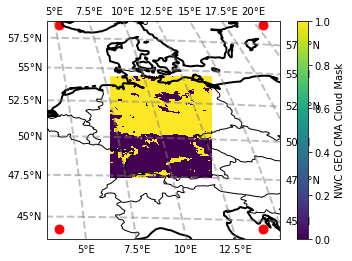

In [16]:
#tester = dat.cma[168:368,370:570]
input_area = dat.cma[140:396,342:598]
output_area = dat.cma[140+64:396-64,342+64:598-64]
data_proj = ccrs.Geostationary(central_longitude=0, 
    satellite_height=35785863.00, sweep_axis="y", globe=ccrs.Globe())
map_proj = data_proj
ax = plt.axes(projection=map_proj)
ax.set_extent([4.5, 14.8, 44, 59], crs=ccrs.PlateCarree()) # (ind fra venstre, ind fra højre, højde nedefra, højde oppefra)
#ax.stock_img()
ax.add_feature(cf.COASTLINE, lw=2)
ax.add_feature(cf.BORDERS)
output_area.plot(transform = data_proj)
#input_area.plot(transform = data_proj)
#dat.cma.plot(transform = data_proj)
#Plotting corner-points (transformation functions found later in this document)
plt.scatter(x = 5.278151413236939, y = 58.62858511635695, color="red", s=80, transform = ccrs.PlateCarree()) #Top-left corner
plt.scatter(x = 3.715224194668945, y = 44.285549828485195, color="red", s=80, transform = ccrs.PlateCarree()) # Bottom-left corner
plt.scatter(x = 14.036919170158745, y = 44.52281739161824, color="red", s=80, transform = ccrs.PlateCarree()) # Bottom-right corner
plt.scatter(x = 20.518835840591922, y = 59.28848849319079, color="red", s=80, transform = ccrs.PlateCarree()) # Top-right
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

# Loading in the raster altitude files

In [2]:
# Data-information found here: https://topotools.cr.usgs.gov/GMTED_viewer/gmted2010_fgdc_metadata.html?fbclid=IwAR3ctjFcfCV-7nrk_esQ5wC-NXDZIPToZd8QTD_Pd-Tm3sno_Jk9ism7N88
# Data-downloader found here: https://topotools.cr.usgs.gov/gmted_viewer/viewer.htm?fbclid=IwAR2mXc5Ae1SCxf1AYaPXTzgq3NnProLhSVWHkCsEKAep4mJ1uuLIcXLZxgs

import rioxarray as rxr
north = rxr.open_rasterio("./TestData/50N000E_20101117_gmted_mea300.tif")
south = rxr.open_rasterio("./TestData/30N000E_20101117_gmted_mea300.tif")


# Plotting of the two raster-altitude files

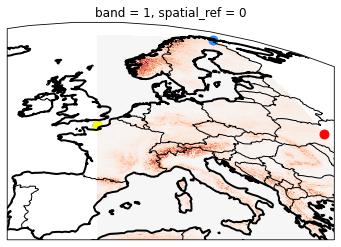

In [8]:
altitude_proj = ccrs.PlateCarree()

cloud_proj = ccrs.Geostationary(central_longitude=0, 
    satellite_height=35785863.00, sweep_axis="y", globe=ccrs.Globe())

ax = plt.axes(projection=cloud_proj)
ax.set_extent([-8.8, 24, 36.5, 90], crs=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE, lw=2)
ax.add_feature(cf.BORDERS)
#dat.cma.plot(transform = cloud_proj, alpha = 0.4)
north.plot(transform = altitude_proj, add_colorbar=False)
south.plot(transform = altitude_proj, add_colorbar=False)
plt.scatter(x = 0, y = 50, color="dodgerblue", s=80, transform = ccrs.PlateCarree())
plt.scatter(x = 30, y = 70, color="dodgerblue", s=80, transform = ccrs.PlateCarree())
plt.scatter(x = 0, y = 30, color="red", s=80, transform = ccrs.PlateCarree())
plt.scatter(x = 30, y = 50, color="red", s=80, transform = ccrs.PlateCarree())
plt.scatter(x = 0.0, y = 4548048.987818995, color="yellow", s=80, transform = cloud_proj)



# Combining the two altitude-files

In [61]:
# Combine_attrs means we are keeping attributes from first xarray (here south, which is fine)
combined = xr.combine_by_coords([south,north], combine_attrs="override")

# Plotting the combined file with cloud-data file

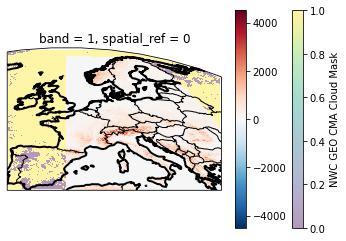

In [62]:
altitude_proj = ccrs.PlateCarree()

cloud_proj = ccrs.Geostationary(central_longitude=0, 
    satellite_height=35785863.00, sweep_axis="y", globe=ccrs.Globe())

ax = plt.axes(projection=cloud_proj)
ax.set_extent([-8.8, 24, 36.5, 90], crs=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE, lw=2)
ax.add_feature(cf.BORDERS)
dat.cma.plot(transform = cloud_proj, alpha = 0.4)
combined.plot(transform = altitude_proj, add_colorbar=True)



# Transforming from latitude/longitude to projection in cloud data

In [63]:
import pyproj

#Defining the two coordinate reference systems
to_crs =  pyproj.CRS(dat.gdal_projection) # Coordinate system used in cloud data
from_crs = pyproj.CRS(north.rio.crs) # Coordinate system used in altitude data

# Two transformes for poit-wise transformations
proj_from_latlon = pyproj.Transformer.from_crs(from_crs, to_crs, always_xy=True)
proj_from_cloud = pyproj.Transformer.from_crs(to_crs, from_crs, always_xy=True)

x1, y1 = (0, 50)
x2, y2 = proj_from_latlon.transform(x1, y1)
print(x2,y2)

0.0 4548048.987818995


## Transforming/reprojecting all altitude data to coordinate system used by cloud data

In [64]:
reproj_combined = combined.rio.reproject(to_crs, nodata = -4000)

## Creating a mask to select area of interest (input_area)

In [65]:
mask = ((reproj_combined.x >= input_area.nx[0])
        & (reproj_combined.x <= input_area.nx[-1])
        & (reproj_combined.y <= input_area.ny[0])
        & (reproj_combined.y >= input_area.ny[-1]))



input_area_altitude = xr.where(mask, reproj_combined, -190)
# Transpose to get it in raster format for plotting
input_area_altitude = input_area_altitude.transpose("band","y","x")
# Dropping values outside of area of interest
input_area_altitude = input_area_altitude.where(input_area_altitude != -190, drop=True)

## Rescaling altitude data to have same spatial resolution as cloud data

In [66]:
import cv2

upscaled = input_area_altitude.data
downscaled = input_area.copy()

# using billinear interpolation (transpose needed to keep the shape used in raster (band,y,x))
downscaled_data = cv2.resize(upscaled.transpose(1,2,0), (256, 256))

# "Inserting" the resampled data into placeholder such that geographic information matches
downscaled.data = downscaled_data

## Plotting the rescaled altitude data

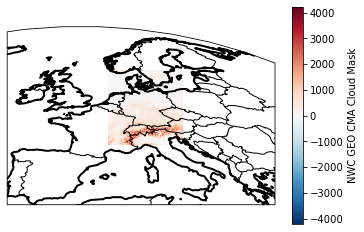

In [67]:
altitude_proj = ccrs.PlateCarree()

cloud_proj = ccrs.Geostationary(central_longitude=0, 
    satellite_height=35785863.00, sweep_axis="y", globe=ccrs.Globe())

ax = plt.axes(projection=cloud_proj)
ax.set_extent([-8.8, 24, 36.5, 90], crs=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE, lw=2)
ax.add_feature(cf.BORDERS)
#dat.cma.plot(transform = cloud_proj, alpha = 0.4)
#combined.plot(transform = altitude_proj, add_colorbar=True)
downscaled.plot()


## Saving the rescaled altitude data

In [70]:
np.save("./TestData/Altitude.npy", downscaled.data)

In [91]:
test = np.round(downscaled.data).astype("int16")

-5

# Loading Land-Sea Mask

In [6]:
lsm = rxr.open_rasterio("./TestData/eea_r_3035_100_m_clc12_V18_5_land_mask.tif")


In [51]:
# Cropping lsm to approximate area
lsm_cropped = lsm[:,13000:33000, 25000:45000]
#tt = test.coarsen(x=36, boundary="pad").max().coarsen(y=36, boundary="pad").max()

## Transforming/reprojecting all altitude data to coordinate system used by cloud data

In [52]:
# Projecting the cropped area to same crs as cloud_data
lsm_cropped_reproj = lsm_cropped.rio.reproject(to_crs, nodata = -1)

## Creating a mask to select area of interest (input_area)

In [53]:
mask = ((lsm_cropped_reproj.x >= input_area.nx[0])
        & (lsm_cropped_reproj.x <= input_area.nx[-1])
        & (lsm_cropped_reproj.y <= input_area.ny[0])
        & (lsm_cropped_reproj.y >= input_area.ny[-1]))



input_area_lsm = xr.where(mask, lsm_cropped_reproj, -190)
# Transpose to get it in raster format for plotting
input_area_lsm = input_area_lsm.transpose("band","y","x")
# Dropping values outside of area of interest
input_area_lsm = input_area_lsm.where(input_area_lsm != -190, drop=True)

## Rescaling LSM data to have same spatial resolution as cloud data

In [55]:
import cv2

upscaled_lsm = input_area_lsm.data
downscaled_lsm = input_area.copy()

# using billinear interpolation (transpose needed to keep the shape used in raster (band,y,x))
downscaled_lsm_data = cv2.resize(upscaled_lsm.transpose(1,2,0), (256, 256))

# "Inserting" the resampled data into placeholder such that geographic information matches
downscaled_lsm.data = downscaled_lsm_data

In [57]:
downscaled_lsm

<xarray.DataArray 'cma' (ny: 256, nx: 256)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])
Coordinates:
  * ny       (ny) float32 4.963e+06 4.96e+06 4.957e+06 ... 4.201e+06 4.198e+06
  * nx       (nx) float32 2.82e+05 2.85e+05 2.88e+05 ... 1.044e+06 1.047e+06
Attributes:
    standard_name:        cloud_binary_mask
    long_name:            NWC GEO CMA Cloud Mask
    valid_range:          [0 1]
    ancillary_variables:  cma_status_flag cma_conditions cma_quality cma_pal
    coordinates:          lon lat
    comment:              0:  Cloud free; 1: Cloudy
    flag_values:          [0 1]
    flag_meanings:        Cloud_free Cloudy
    Subsetting_info:      Original shape: (3712, 3712) - Subsetting along Xdi...

## Plotting the rescaled LSM data

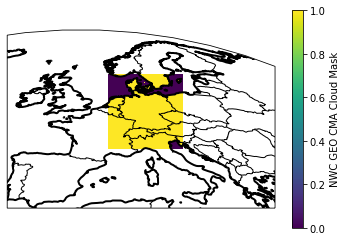

In [58]:
altitude_proj = ccrs.PlateCarree()

cloud_proj = ccrs.Geostationary(central_longitude=0, 
    satellite_height=35785863.00, sweep_axis="y", globe=ccrs.Globe())

ax = plt.axes(projection=cloud_proj)
ax.set_extent([-8.8, 24, 36.5, 90], crs=ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE, lw=2)
ax.add_feature(cf.BORDERS)
#dat.cma.plot(transform = cloud_proj, alpha = 0.4)
#combined.plot(transform = altitude_proj, add_colorbar=True)
#downscaled.plot()

downscaled_lsm.plot()

## Saving the Rescaled LSM data

In [94]:
np.save("./TestData/LandSea.npy", downscaled_lsm.data)

# Merging two altitude files (a different way)

In [ ]:
from rasterio.merge import merge
import rasterio
first = rasterio.open("./TestData/50N000E_20101117_gmted_mea300.tif")
second = rasterio.open("./TestData/30N000E_20101117_gmted_mea300.tif")
mosaic, out_trans = merge([first,second])
mosaic.shape